 -*- coding: utf-8 -*-
<br>
#### Created on Tue Apr 27 14:48:49 2021
<br>
<b> @author: Minhaj Azmi </b>


# Tutorial for Visualizing the Decision Matrix while working on CCPP                    By Using Seaborn & Matplotlib

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

## Objective:

The objective of this tutorial is to Create plots for a Decision Matrix and visualise the results. For this purpose, a predefined Data (CSV) is provided as an input file.

### 1. Importing prerequisites

For this notebook, import of additional modules is rerquired.<br>
<br>
<br>
<b>
os is imported as general. <br>
pandas is imported for data manipulation. <br>
numpy is imported for data manipulation. <br>
seaborn is imported to develop co-relation heat map and Pairplots. <br>
    <br>
Matplotlib is imported to create plots<br>
</b>


In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### 2. Decision Matrix Data (.CSV file)
<br>
the own created data sheet on excel should be attached in the given below code.



In [5]:
df = pd.read_csv('../email automation/CCPP.csv')
#print data just to make sure the CSV is read successfully.
df.head()

,Coal,Coal Gasification,Natural Gas,Furnace Oil,Class
0,0,-1.0,-1,-1.0,Lifetime of plant
1,0,-1.0,0,1.0,Safety of plant
2,0,-2.0,-1,0.0,Maturity of Pant
3,0,1.5,2,0.5,Overall Efficiency
4,0,-2.0,-1,-1.0,Investment Cost


### 3. Correlation Formation
<br>
Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.
<br>
<br>
<b>Firstly, calculate the correlation matrix. <br>
Secondly, recheck the data by print command. <br>

In [7]:
#Important: Corr is only used for heatmap.
corr = df.corr()
#NaN means Zero (0) values
print (corr)

                   Coal  Coal Gasification  Natural Gas  Furnace Oil
Coal                NaN                NaN          NaN          NaN
Coal Gasification   NaN           1.000000     0.621748    -0.144973
Natural Gas         NaN           0.621748     1.000000     0.490254
Furnace Oil         NaN          -0.144973     0.490254     1.000000


### 4. Correlation Visualization through Seaborn
<br>
<b>By generating Heatmap, one can show the corelation of the features we provided in the CSV file.

<ipython-input-10-a3b7ea5dad9b>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlGn"))
  cmap.set_bad('lightgreen')


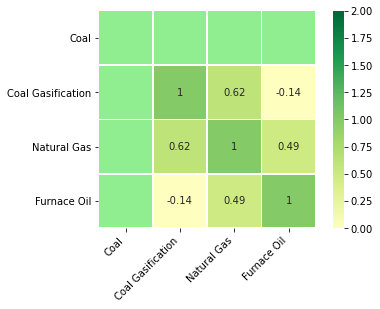

In [10]:
#cmap is color commands. set_bad is for those values which are 0 and showing white colors in the background.
cmap = plt.get_cmap('RdYlGn')   # default color
cmap.set_bad('lightgreen') 

#from here the heatmap starts;
ax = sns.heatmap(
    corr, 
    vmin=-0, vmax=2, center=0,
    cmap=cmap,
    square=True, annot=True, linewidths=.5,
)

#these are the commands to make the heatmap more better in terms of visualizing as it adds axis labels and etc.
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

###  5. Joint Plots & Barplots

These plots are very interesting to visualize a single CCPP concept with criteria.

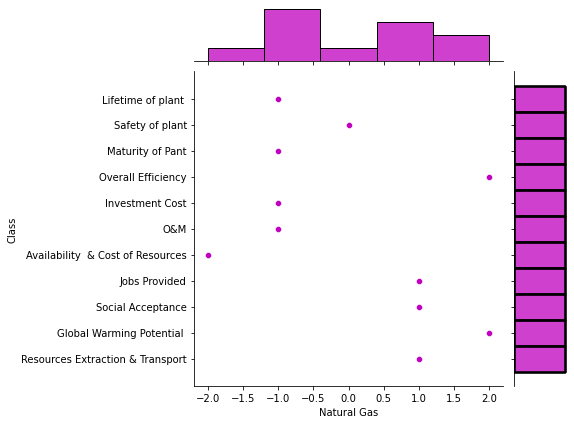

In [13]:
#It's easy just compare the concept with the Class (name the x and y, accordingly)
ax = sns.jointplot(x='Natural Gas', y='Class', data=df, color="m")

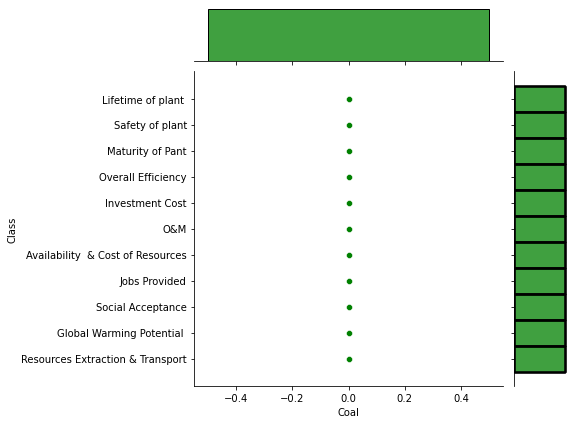

In [14]:
#another Example
#Coal is the base case so all the values are at Zero

ax = sns.jointplot(x='Coal', y='Class', data=df, 
                   color="g")

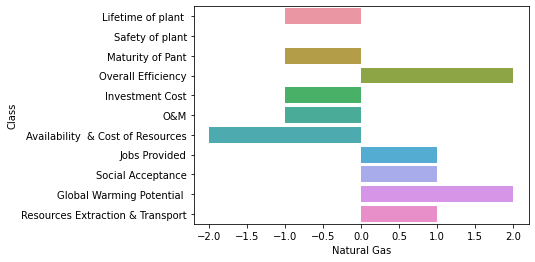

In [24]:
#Barplot, a tornado chart showing good visuals.

ax = sns.barplot(x="Natural Gas", y="Class", 
                 data=df, dodge=True, ci=95, seed="Coal"
                  ,errcolor="0.80" )

### 6. PairGrid Plots
<br>
A <b>PairGrid Plots</b> allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python.
<br>

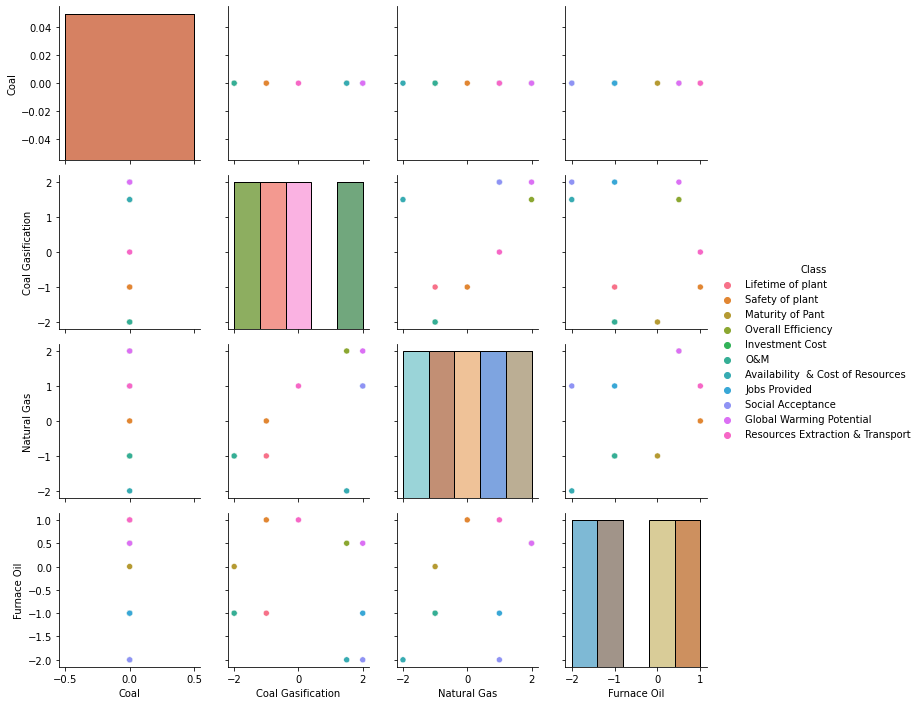

In [25]:
#First kind of Pairplot with Histogram
g = sns.PairGrid(df, hue="Class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

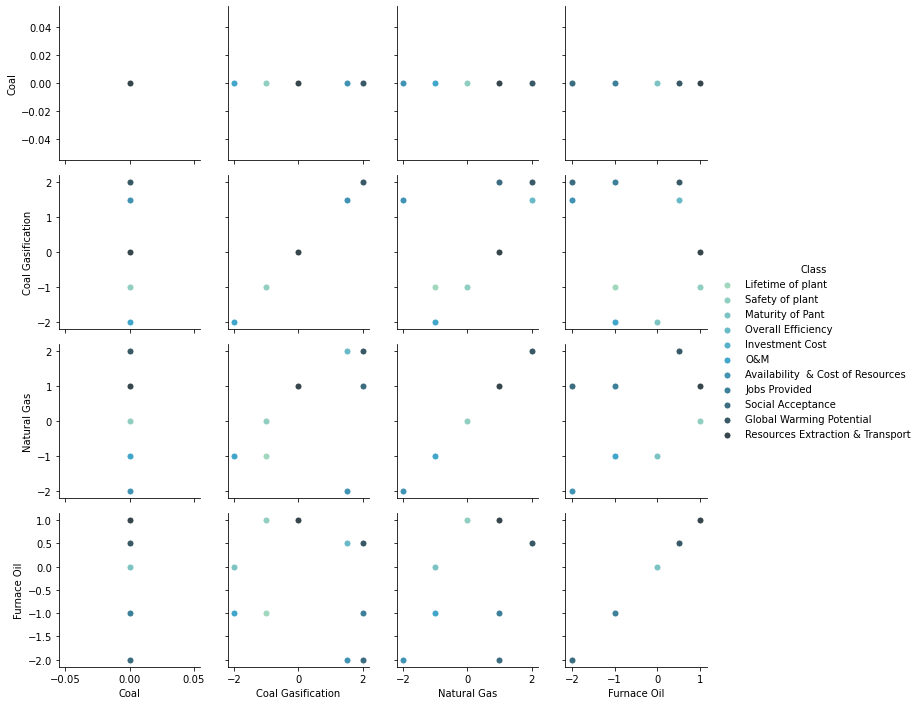

In [27]:
#Second kind of Pairplot
g = sns.PairGrid(df, hue="Class", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

### 7. Additional Feature (Merging Graphs)

Some use full codes to merge the graphs.

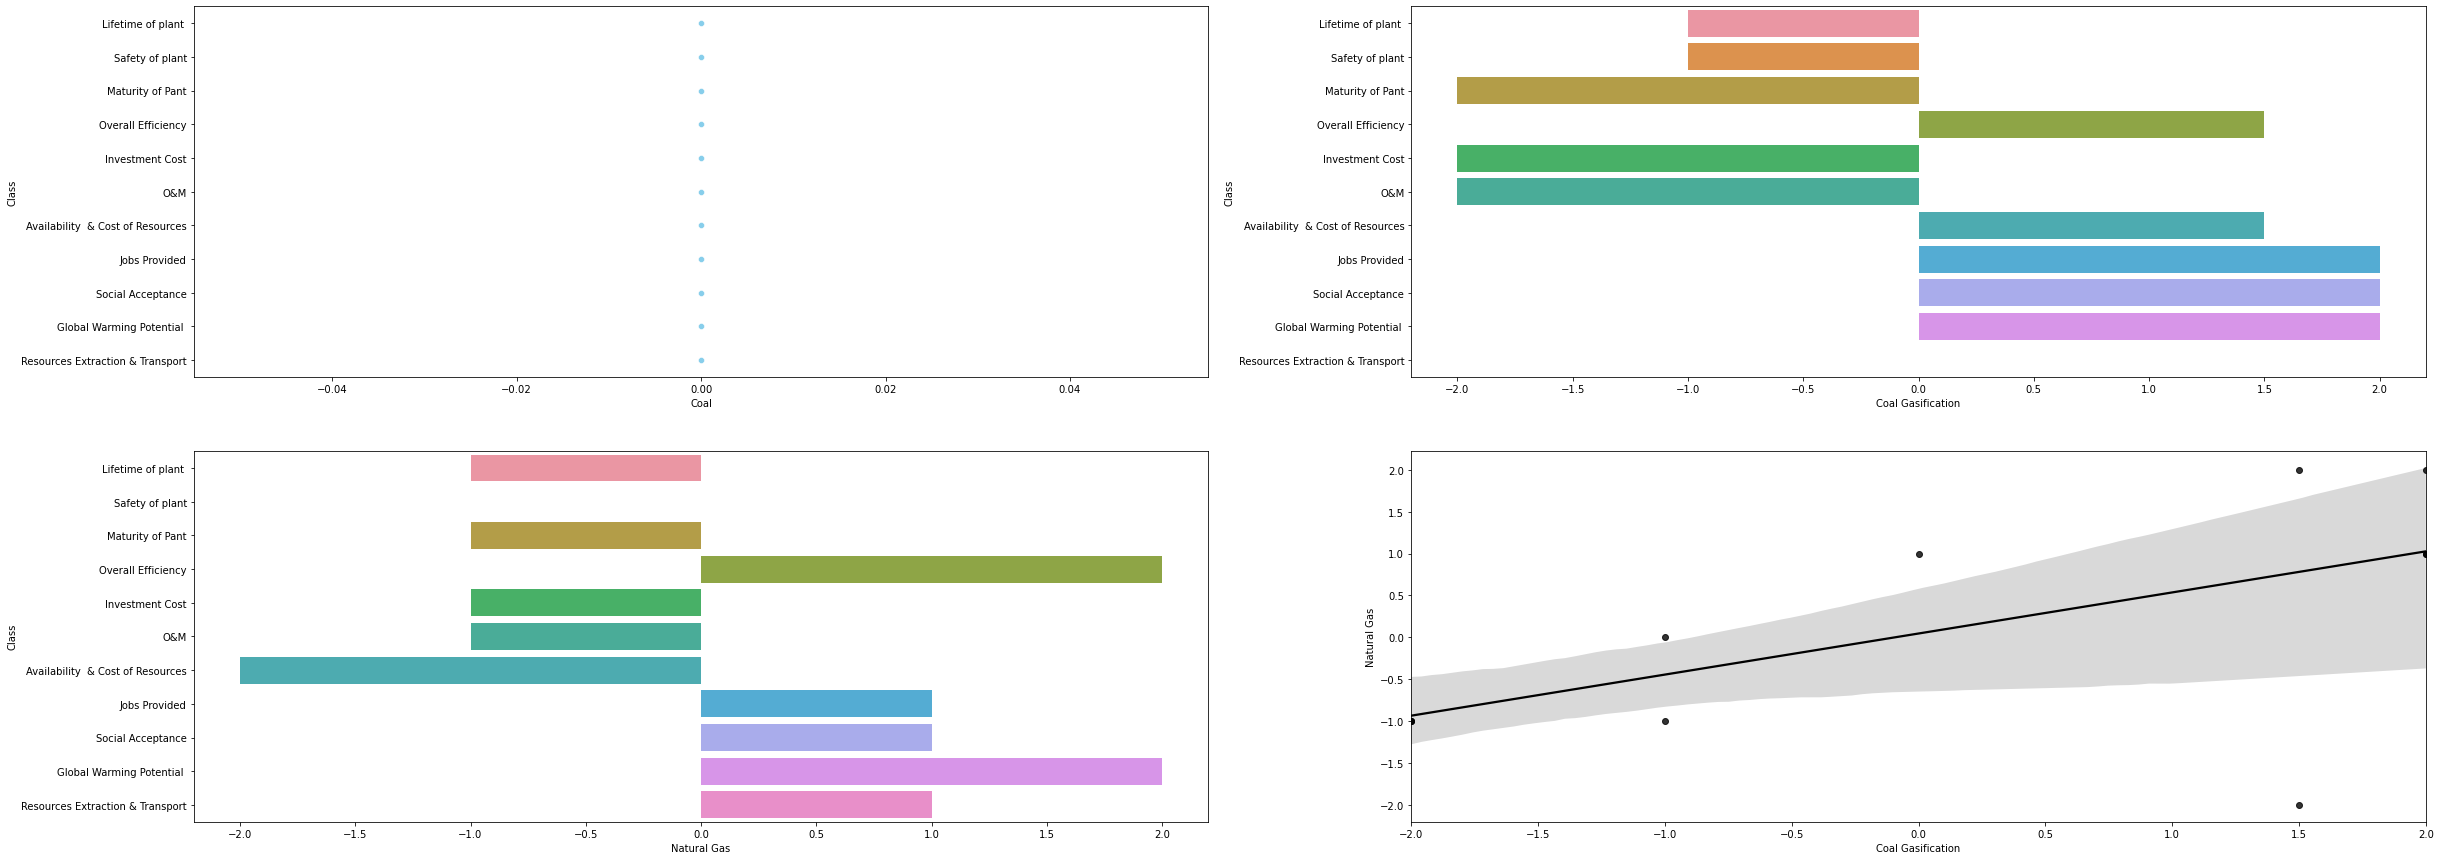

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(40, 15))
sns.scatterplot(data=df, x="Coal", color="skyblue", ax=axs[0, 0], y="Class")
sns.barplot(data=df, x="Coal Gasification", ax=axs[0, 1], y="Class")
sns.barplot(data=df, x="Natural Gas", ax=axs[1, 0], y="Class")
sns.regplot(data=df, x="Coal Gasification", color="black", ax=axs[1, 1], y="Natural Gas")

plt.show()


## --Tutorial Ended Here

It's not compulsory to use all the plots, one can choose their own style to present the Decision Matrix in a more better way.